In [104]:
import numpy as np
from tqdm import tqdm
from collections import defaultdict
import json
import networkx as nx
import pandas as pd
from ast import literal_eval
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt


In [73]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

In [74]:
G = read_json_file('./data/graph.json')

In [75]:
field_list = []

def remove_node_if_no_field(author):
    try:
        field = G.nodes[author]['top_field']
        field_list.append(field)
    except KeyError:
        G.remove_node(author)

authors = list(G.nodes)
for a in authors:
    remove_node_if_no_field(a)

In [82]:
n = len(G.nodes)
print(n)

5652


In [77]:
print(G.nodes[83401236]['top_field'])
print(list(G.adj[83401236]))

Geography
[]


In [117]:
def edge_same_top_field(edge, graph):
    field_a = graph.nodes[edge[0]]['top_field']
    field_b = graph.nodes[edge[1]]['top_field']
    return field_a == field_b



In [118]:
top_field_fraq_list = [edge_same_top_field(edge, G) for edge in list(G.edges)]

In [119]:
top_field_fraq = np.mean(top_field_fraq_list)

In [124]:
def randomize_field_get_mean(graph):
    for author, field in zip(list(graph.nodes), np.random.permutation(field_list)):
        graph.nodes[author]['top_field'] = field

    top_field_fraq = [edge_same_top_field(edge, graph) for edge in list(graph.edges)]

    return np.mean(top_field_fraq)

results = []
N_repeat = 500
graph_copy = G.copy()

for i in tqdm(range(N_repeat)):
    results.append(randomize_field_get_mean(graph_copy))

100%|██████████| 500/500 [00:11<00:00, 42.84it/s]


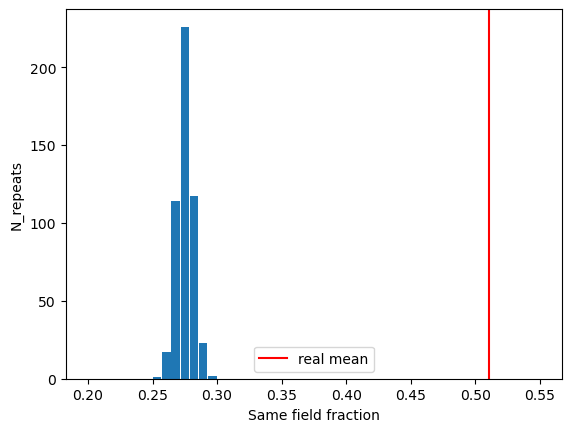

In [126]:
bins = np.linspace(0.2, 0.55, 50)
hist, edges = np.histogram(results, bins=bins)
x = (edges[1:] + edges[:-1])/2
width = bins[1] - bins[0]

fig, axs = plt.subplots()
axs.bar(x, hist, width=width*0.9)

axs.set_xlabel('Same field fraction')
axs.set_ylabel('N_repeats')
axs.axline((top_field_fraq, 0), (top_field_fraq, max(results)), color='red', label='real mean')
axs.legend()